In [ ]:
%load_ext autoreload
%autoreload 2

# Perceptron

Useful links:

* https://playground.tensorflow.org
* https://www.geogebra.org/m/jmTFk4eg


### Setup


In [ ]:
# If True, test is running on Colab. Otherwise, test if assumed to be offline.
TEST_ON_COLAB = False

FOLDERNAME = "Colab Notebooks/ann/1_perceptron" # only used if TEST_ON_COLAB is True
DATASET_OPENML_ID = "spambase" # dataset to use for testing  

assert not (FOLDERNAME is None and TEST_ON_COLAB), "FOLDERNAME has to be set if TEST_ON_COLAB is True"
assert DATASET_OPENML_ID is not None, "DATASET_OPENML_ID is not set"

Set a seed for reproducibility:

In [ ]:
SEED = 42

In [ ]:
import numpy as np

np.random.seed(SEED)

## Working with an artificially-generated dataset

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

X, y = make_blobs(
    n_samples=100, centers=2, cluster_std=1.5, n_features=2, random_state=SEED
)
y[y==0] = -1
print(X[:10])
print(y[:10])
print(f"#samples positive class: {np.sum(y == 1)}")
print(f"#samples negative class: {np.sum(y == -1)}")

plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="orange")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(["negative class", "positive class"])
plt.show()

### Basic perceptron

Perceptron computation (withou bias) is based on the following formula:

$$
\begin{aligned}
\hat{y} = & \text{sign}\left\{\sum_{j=1}^{m} w_j x_j\right\}\\
&\text{sign}\{\mathbf{w} \cdot \mathbf{x}\}
\end{aligned}
$$


where $\hat{y}$ is the predicted output, $\mathbf{w}$ is the weight vector, $\mathbf{x}$ is the input vector, and $\text{sign}$ is the function that returns the sign (+ ou -) of the argument.

Example for the first row of the dataset:

In [ ]:
x_0 = X[0] # first sample
w = np.array([4, 1])#5 * np.random.rand(2) # random weights

def predict(x, w):
    return 1 if np.dot(x, w) > 0 else -1

print(f"Weights: {w}")
print(f"Prediction for first sample: {predict(x_0, w)}")
print(f"True label for first sample: {y[0]}")

In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_pred = [predict(x, w) for x in X]
print(f"Accuracy: {accuracy(y, y_pred)}")

#### Decision boundary

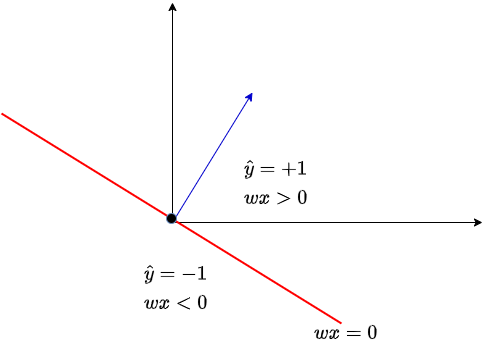

In [ ]:
# plot decision boundary
x1 = np.linspace(-10, 10, 100)
x2 = -w[0] / w[1] * x1

plt.plot(x1, x2, color="black") # decision boundary
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="orange") # negative class
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue") # positive class
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units="xy", angles="xy", color="green")  # weight vector
plt.legend(["decision boundary", "negative class", "positive class", "$w$"])
plt.grid(True)
plt.axis("equal")
plt.xlim(-10, 10)
plt.ylim(-15, 15)
plt.show()

### Bias neurons

Perceptron computation with bias is based on the following formula:

$$
\begin{aligned}
\hat{y} = & \text{sign}\left\{\sum_{j=1}^{m} w_j x_j + b\right\}\\
&\text{sign}\{\mathbf{w} \cdot \mathbf{x} + b\}
\end{aligned}
$$

where $\hat{y}$ is the predicted output, $\mathbf{w}$ is the weight vector, $\mathbf{x}$ is the input vector, $b$ is the bias, and $\text{sign}$ is the function that returns the sign (+ ou -) of the argument.

Example for the first row of the dataset:

In [ ]:
x_0 = X[0]  # first sample
w = np.array([2, -2])  # weights
b = 3 # bias

def predict(x, w, b):
    return 1 if np.dot(x, w) + b > 0 else -1


print(f"Prediction for first sample: {predict(x_0, w, b)}")
print(f"True label for first sample: {y[0]}")

In [ ]:
y_pred = [predict(x, w, b) for x in X]
print(f"Accuracy: {accuracy(y, y_pred)}")

#### Decision boundary

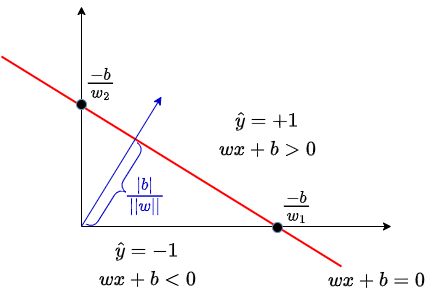

In [ ]:
# plot decision boundary
x1 = np.linspace(-10, 10, 100)
x2 = (-b - w[0]*x1) / w[1]

print(x1[0], x2[0], w)

plt.plot(x1, x2, color="black")  # decision boundary
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color="orange")  # negative class
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue")  # positive class
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units="xy", angles="xy", color="green")  # weight vector
plt.legend(["decision boundary", "negative class", "positive class", "$w$"])
plt.axis("equal")
plt.grid(True)
plt.show()

### Training the Perceptron

Go through the input-output pairs $(\mathbf{x}_i, y_i)$ one by one and make updates, if predicted value $\hat{y}_i$ is different from observed
value $y$:

$$w \leftarrow w + \alpha \underbrace{(y_i - \hat{y}_i)}_{\text{error}}\mathbf{x}_i,$$

where:
- $\alpha$ is the learning rate (determine the speed of convergence, but any positive value will lead to convergence).
- $y_i \in \{-1, +1\}$ is the observed value (ground truth) of the $i$-th input.
- $\hat{y}_i \in \{-1, +1\}$ is the predicted value of the $i$-th input.

If $y_i \neq \hat{y}_i$ (error),

$$
\begin{aligned}
y_i &= -\hat{y}_i\\
y_i + y_i &= y_i -\hat{y}_i\\
2y_i &= y_i -\hat{y}_i.
\end{aligned}
$$

Therefore,

$$ w \leftarrow w + \underbrace{(2\alpha)}_{\alpha'}y_i \mathbf{x}_i.$$


Adding bias term to X:

In [ ]:
X_b = np.hstack([X, np.ones((X.shape[0], 1))])  # add bias term
X_b[:5]

In [ ]:
num_epochs = 10
learning_rate = 0.001

# Random weights initialization
w = np.random.normal(size=X_b.shape[1])

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    for i, x in enumerate(X_b):
        z = np.dot(x, w)
        y_pred = 1 if z > 0 else -1

        # Loss
        loss_value = max(0, -y[i] * z)
        loss_history.append(loss_value)

        # Print loss
        print(f"Iteration {iteration}: Loss {loss_value}")

        # Update weights
        w = w + learning_rate * (y[i] - y_pred) * x

        # # Alternatively, ....
        # if (-y[i] * z) > 0:
        #     w = w + learning_rate * y[i] * x

        iteration += 1

Training curve:

In [ ]:
fig, ax = plt.subplots(figsize=(24, 3))

plt.plot(loss_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Decision boundary:

In [ ]:
# plot decision boundary
x1_min = X_b[:, 0].min()
x1_max = X_b[:, 0].max()
x2_min = (-w[2] - w[0] * x1_min) / w[1]
x2_max = (-w[2] - w[0] * x1_max) / w[1]

print(x1_min, x1_max, x2_min, x2_max)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="black")  # decision boundary
plt.scatter(X_b[y == -1][:, 0], X_b[y == -1][:, 1], color="orange")  # negative class
plt.scatter(X_b[y == 1][:, 0], X_b[y == 1][:, 1], color="blue")  # positive class
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units="xy", angles="xy", color="green")  # weight vector
plt.legend(["decision boundary", "negative class", "positive class", "$w$"])
plt.xlim(-7, 11)
plt.ylim(-1, 13)
# plt.axis("equal")
plt.grid(True)
plt.show()

#### Perceptron vs. Linear SVMs

Perceptron criterion:

$$ L_i = \max(0, -y_i(\mathbf{w} \cdot \mathbf{x}_i))$$

Linear SVM criterion:

$$ L_i = \max(0, 1 - y_i(\mathbf{w} \cdot \mathbf{x}_i))$$


In [ ]:
num_epochs = 10
learning_rate = 0.001

# Random weights initialization
w = np.random.normal(size=X_b.shape[1])

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    for i, x in enumerate(X_b):
        z = np.dot(x, w)
        y_pred = 1 if z > 0 else -1

        # Loss
        loss_value = max(0, 1 - y[i] * z)
        loss_history.append(loss_value)

        # Print loss
        print(f"Iteration {iteration}: Loss {loss_value}")

        # Update weights
        if (1 - y[i] * z) > 0: # barely correct
            w = w + learning_rate * y[i] * x

        iteration += 1

In [ ]:
# plot decision boundary
x1_min = X_b[:, 0].min()
x1_max = X_b[:, 0].max()
x2_min = (-w[2] - w[0] * x1_min) / w[1]
x2_max = (-w[2] - w[0] * x1_max) / w[1]

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="black")  # decision boundary
plt.scatter(X_b[y == -1][:, 0], X_b[y == -1][:, 1], color="orange")  # negative class
plt.scatter(X_b[y == 1][:, 0], X_b[y == 1][:, 1], color="blue")  # positive class
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units="xy", angles="xy", color="green") # weight vector
plt.legend(["decision boundary", "negative class", "positive class", "$w$"])
plt.xlim(-7, 11)
plt.ylim(-1, 13)
# plt.axis("equal")
plt.grid(True)
plt.show()

## Case study: SPAM detection

In [ ]:
# Create dataset directory

import os

if TEST_ON_COLAB:
    # This mounts your Google Drive to the Colab VM.
    from google.colab import drive

    drive.mount('/content/drive')
    cache_dir = f"/content/drive/My Drive/{FOLDERNAME}/dataset/{DATASET_OPENML_ID}"
else:
    cache_dir =  f"dataset/{DATASET_OPENML_ID}"

os.makedirs(cache_dir, exist_ok=True)

Fetching the SPAMBASE dataset.

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

X_file_path = f"{cache_dir}/X.npy"
y_file_path = f"{cache_dir}/y.npy"

# Check if the dataset files already exist
if not (os.path.exists(X_file_path) and os.path.exists(y_file_path)):
    # Download the SPAMBASE dataset
    X, y = fetch_openml(DATASET_OPENML_ID, as_frame=False, cache=True, return_X_y=True)
    
    # Save the dataset as numpy arrays
    np.save(X_file_path, X.astype(np.float32))
    np.save(y_file_path, y.astype(np.float32))
    print(f"SPAMBASE dataset downloaded and saved successfully to {cache_dir}.")
else:
    X = np.load(X_file_path, allow_pickle=True)
    y = np.load(y_file_path, allow_pickle=True)
    print(f"SPAMBASE dataset already exists in {cache_dir}. Skipping download.")

print(X.shape)
print(X.min(), X.max())

Splitting the dataset into training, validation and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(SEED)

# Split the data into train and test sets
y[y==0] = -1 # convert 0 labels to -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

#### Implementation of a class Perceptron

In [ ]:
class Perceptron:
    def __init__(self, num_epochs=10, learning_rate=1e-03, include_bias=True):
        """ Initialize the perceptron model.
        
        Args:
            num_epochs (int): Number of epochs to train the model.
        """
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.w = None
        self.include_bias = include_bias

    def fit(self, X, y):
        """ Fit the perceptron model.
        
        Args:
            X (ndarray): Input data of shape (num_samples, num_features).
            y (ndarray): Target labels of shape (num_samples,).
        """
        
        # Add bias term
        if self.include_bias:
            X = np.hstack([X, np.ones((X.shape[0], 1))])
        
        # Random weights initialization
        self.w = np.random.normal(size=X.shape[1])

        for epoch in range(self.num_epochs):
            for i, x in enumerate(X):
                z = np.dot(x, self.w)
                y_pred = 1 if z > 0 else -1
                self.w = self.w + self.learning_rate * (y[i] - y_pred) * x
        
        return self
    
    def predict(self, X):
        """ Predict the target labels.
        
        Args:
            X (ndarray): Input data of shape (num_samples, num_features).
        
        Returns:
            ndarray: Predicted target labels of shape (num_samples,).
        """
        
        if self.include_bias:
            X = np.hstack([X, np.ones((X.shape[0], 1))])
        
        return np.array([1 if np.dot(x, self.w) > 0 else -1 for x in X])

#### Training the Perceptron

In [ ]:
model = Perceptron(num_epochs=50, learning_rate=1e-02)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Classification report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[-1, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["not spam", "spam"])
disp.plot()
plt.show()

# Compute classification report
class_report = classification_report(y_test, y_pred, target_names=["not spam", "spam"])

print("\nClassification Report:")
print(class_report)